In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Now you can zoom
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [2]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [3]:
import os
import struct
class MNIST():
    def __init__(self, directory):
        self._directory = directory
        
        self._training_data = self._load_binaries("train-images.idx3-ubyte")
        self._training_labels = self._load_binaries("train-labels.idx1-ubyte")
        self._test_data = self._load_binaries("t10k-images.idx3-ubyte")
        self._test_labels = self._load_binaries("t10k-labels.idx1-ubyte")
        
        np.random.seed(0)
        samples_n = self._training_labels.shape[0]
        random_indices = np.random.choice(samples_n, samples_n // 10, replace = False)
        np.random.seed()
        
        self._validation_data = self._training_data[random_indices]
        self._validation_labels = self._training_labels[random_indices]
        self._training_data = np.delete(self._training_data, random_indices, axis = 0)
        self._training_labels = np.delete(self._training_labels, random_indices)
    
    def _load_binaries(self, file_name):
        path = os.path.join(self._directory, file_name)
        
        with open(path, 'rb') as fd:
            check, items_n = struct.unpack(">ii", fd.read(8))

            if "images" in file_name and check == 2051:
                height, width = struct.unpack(">II", fd.read(8))
                images = np.fromfile(fd, dtype = 'uint8')
                return np.reshape(images, (items_n, height, width))
            elif "labels" in file_name and check == 2049:
                return np.fromfile(fd, dtype = 'uint8')
            else:
                raise ValueError("Not a MNIST file: " + path)
    
    
    def get_training_batch(self, batch_size):
        return self._get_batch(self._training_data, self._training_labels, batch_size)
    
    def get_validation_batch(self, batch_size):
        return self._get_batch(self._validation_data, self._validation_labels, batch_size)
    
    def get_test_batch(self, batch_size):
        return self._get_batch(self._test_data, self._test_labels, batch_size)
    
    def _get_batch(self, data, labels, batch_size):
        samples_n = labels.shape[0]
        if batch_size <= 0:
            batch_size = samples_n
        
        random_indices = np.random.choice(samples_n, samples_n, replace = False)
        data = data[random_indices]
        labels = labels[random_indices]
        for i in range(samples_n // batch_size):
            on = i * batch_size
            off = on + batch_size
            yield data[on:off], labels[on:off]
    
    
    def get_sizes(self):
        training_samples_n = self._training_labels.shape[0]
        validation_samples_n = self._validation_labels.shape[0]
        test_samples_n = self._test_labels.shape[0]
        return training_samples_n, validation_samples_n, test_samples_n

In [4]:
# Hyperparameters
import os
epochs = 1 #Repeat training with same dataset
batch_size = 10#divide dataset in batches of this size for training
learning_rate = .01

input_size = 28
mnist = MNIST(os.getcwd())

In [57]:
from keras import backend as K

In [188]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import keras


In [177]:
K.clear_session()#Make sure that memory is freed when loading multiple times
tf.reset_default_graph()

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding = "SAME", activation = "tanh"))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

for layer in model.layers:
    print(layer.output_shape)

(None, 28, 28, 16)
(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 13, 13, 32)
(None, 5408)
(None, 512)
(None, 512)
(None, 10)


In [182]:
K.clear_session()
tf.reset_default_graph()

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding = "SAME", activation = "relu"))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

for layer in model.layers:
    print(layer.output_shape)

(None, 28, 28, 16)
(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 13, 13, 32)
(None, 5408)
(None, 512)
(None, 512)
(None, 10)


In [178]:
K.clear_session()
tf.reset_default_graph()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


for layer in model.layers:
    print(layer.output_shape)

(None, 26, 26, 32)
(None, 24, 24, 64)
(None, 12, 12, 64)
(None, 12, 12, 64)
(None, 9216)
(None, 128)
(None, 128)
(None, 10)


In [183]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(lr=0.1),
              metrics=['accuracy'])

In [184]:
for batch, label_batch in  MNIST(os.getcwd()).get_training_batch(batch_size = 20000):
    #label_batch = keras.utils.to_categorical(label_batch,10)
    model.fit(np.expand_dims(batch,axis=3),label_batch)
    break

Epoch 1/1
20000/20000 [==============================] - 50s 2ms/step - loss: 3.3701 - acc: 0.7115


In [187]:
step = 1
for epoch in range(epochs):

    print('Epoch = ', epoch + 1)
    prelim_acc = 0

    for batch, label_batch in mnist.get_training_batch(batch_size = batch_size):
        #label_batch = keras.utils.to_categorical(label_batch,10)
        stat = model.fit(np.expand_dims(batch,axis=3),label_batch, verbose = 0)#verbose =0 supresses output
        
        prelim_acc += stat.history["acc"][0]

        if (epoch % 100)==0:
            print(prelim_acc/100)
            prelim_acc = 0
        
        epoch+=1
        #K.clear_session()
        #tf.reset_default_graph()
        

Epoch =  1
0.008999999761581421
0.8509999918937683
0.8669999927282334
0.8609999924898147
0.8509999969601632
0.8679999953508377
0.8909999942779541
0.8909999912977219
0.8649999910593033
0.8909999942779541
0.8929999941587448
0.8969999915361404
0.8929999911785126
0.8869999921321869
0.8859999907016755
0.8919999939203263
0.9189999926090241
0.8909999936819076
0.8939999926090241
0.898999993801117
0.9219999921321869
0.9149999904632569
0.9049999886751174
0.9099999916553497
0.9009999924898148
0.924999993443489
0.922999991774559
0.9049999922513962
0.9149999928474426
0.9369999915361404
0.9289999920129776
0.9289999932050705
0.9159999936819077
0.9299999928474426
0.9539999932050705
0.9269999927282333
0.9269999957084656
0.9309999924898148
0.9179999911785126
0.923999993801117
0.9399999904632569
0.930999995470047
0.9249999910593033
0.9449999916553498
0.9479999929666519
0.9359999912977218
0.9329999923706055
0.9379999923706055
0.9449999940395355
0.9469999945163727
0.9499999928474426
0.9319999945163727
0.93

In [200]:
test_source, test_target = next(mnist.get_validation_batch(batch_size = 1000))
model.evaluate(np.expand_dims(test_source,axis=3),test_target)

1000/1000 [==============================] - 0s 481us/step


[0.08044605163740925, 0.977]

In [34]:
graph = tf.Graph()

learning_rate = 1e-4

with graph.as_default():#Override default graph if running cell multiple times
    input_layer = tf.placeholder(tf.float32, shape = [None, input_size, input_size])
    input_layer1 = tf.expand_dims(input_layer,3)
    labels = tf.placeholder(tf.int64, shape = [None])
    #print(input_layer1.shape)
    
    with tf.variable_scope("CNN_and_maxpool_1"):
        kernels_1 = tf.Variable(tf.truncated_normal([5, 5, 1, 16], stddev = 0.1))
        convolution_1 = tf.nn.conv2d(input_layer1, kernels_1, strides = [1, 1, 1, 1], padding = "SAME")
        
        biases_1 = tf.Variable(tf.constant(0.0, shape = [16]))
        feature_maps_1 = tf.nn.tanh(convolution_1 + biases_1)
        pool_1 = tf.nn.max_pool(feature_maps_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")
    
    print(feature_maps_1.shape)
    print(pool_1.shape)    
    with tf.variable_scope("CNN_and_maxpool_2"):
        kernels_2 = tf.Variable(tf.truncated_normal([3, 3, 16, 32], stddev = 0.1))
        convolution_2 = tf.nn.conv2d(pool_1, kernels_2, strides = [1, 1, 1, 1], padding = "SAME")
        biases_2 = tf.Variable(tf.constant(0.0, shape = [32]))
        feature_maps_2 = tf.nn.tanh(convolution_2 + biases_2)
        pool_2 = tf.nn.max_pool(feature_maps_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")
    
    print(feature_maps_2.shape)
    print(pool_2.shape)
    
    with tf.variable_scope("Fully_connected_layers"):
        flattened = tf.reshape(pool_2, [-1, 7*7*32 ]) ##TO BE ADJUSTED: MUST MATCH NUMBER OF NEUROS OF PREVIOUS layer
        print(str(flattened.shape))

        weights_3 = tf.Variable(tf.truncated_normal([7*7*32, 512], stddev = 2048**(-1/2)))#TO BE ADJUSTED
        biases_3 = tf.Variable(tf.constant(0.0, shape = [512]))
        hidden_layer = tf.nn.tanh(tf.matmul(flattened, weights_3) + biases_3)
        print(hidden_layer.shape)

        weights_4 = tf.Variable(tf.truncated_normal([512, 10], stddev = 512**(-1/2)))
        biases_4 = tf.Variable(tf.constant(0.0, shape = [10]))
        output_layer_logits = tf.matmul(hidden_layer, weights_4) + biases_4
        label = tf.argmax(output_layer_logits,1)

        print(output_layer_logits.shape)

        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = labels, logits = output_layer_logits)
        cross_entropy = tf.reduce_mean(cross_entropy)
    
    with tf.variable_scope("Optimizer"):
        optimizer = tf.train.AdamOptimizer(learning_rate)
        optimization_step = optimizer.minimize(cross_entropy)
    
    with tf.variable_scope("Accuracy"):
        accuracy = tf.equal(tf.argmax(tf.nn.softmax(output_layer_logits), 1), labels)
        accuracy = tf.reduce_mean(tf.cast(accuracy, tf.float32))
        
    saver = tf.train.Saver()

(?, 28, 28, 16)
(?, 14, 14, 16)
(?, 14, 14, 32)
(?, 7, 7, 32)
(?, 1568)
(?, 512)
(?, 10)


In [6]:
def mean_accuracy(steps = 10, mode = "validation"):
    #Here we do the forward step 10 times and return the average accuracy
    prelim_mean = 0.0
    _accuracy = 0.0
    step = 0
    
    if mode == "validation":
        batches = mnist.get_validation_batch(batch_size)
    if mode == "test":
        batches = mnist.get_test_batch(batch_size)
        
    for batch, label_batch in mnist.get_training_batch(batch_size):

            _accuracy, _ = session.run(
                [accuracy, optimization_step],
                    feed_dict = {
                        input_layer: batch,
                        labels : label_batch
                    }
                )
            #summery_file_writer.add_summary(_summary, step) #write summary to file
            step += 1
            prelim_mean += _accuracy
            if step == steps:
                return prelim_mean/step
    return prelim_mean/step

In [ ]:
with graph.as_default():
    session = tf.InteractiveSession()
    session.run(tf.global_variables_initializer())
    
    step = 1
    for epoch in range(epochs):

        print('Epoch = ', epoch + 1)
        
        for batch, label_batch in mnist.get_training_batch(batch_size = batch_size):
            _accuracy, _ = session.run([accuracy, optimization_step],feed_dict = { input_layer: batch,labels : label_batch })
                
            step += 1                                
            if ((step % 50)==0):
                validation_accuracy = mean_accuracy(10)
                print('Step = ' + str(step) + '; Accuracy = ' + str(validation_accuracy))

    
    #Test accuracy
    test_accuracy = mean_accuracy(-1,"test")
    print("\n Test accuracy = " + str(test_accuracy))

Epoch =  1
Step = 50; Accuracy = 0.6900000035762787
Step = 100; Accuracy = 0.7899999916553497
Step = 150; Accuracy = 0.8899999916553497
Step = 200; Accuracy = 0.8799999833106995
Step = 250; Accuracy = 0.8699999988079071
Step = 300; Accuracy = 0.9399999856948853
Step = 350; Accuracy = 0.9199999928474426
Step = 400; Accuracy = 0.9199999928474426
Step = 450; Accuracy = 0.949999988079071
Step = 500; Accuracy = 0.9199999809265137
Step = 550; Accuracy = 0.8899999976158142
Step = 600; Accuracy = 0.8999999940395356
Step = 650; Accuracy = 0.9499999940395355
Step = 700; Accuracy = 0.9099999904632569
Step = 750; Accuracy = 0.949999988079071
Step = 800; Accuracy = 0.9300000011920929
Step = 850; Accuracy = 0.9799999952316284
Step = 900; Accuracy = 0.9399999916553498
Step = 950; Accuracy = 0.9699999988079071
Step = 1000; Accuracy = 0.9399999916553498
Step = 1050; Accuracy = 0.949999988079071
Step = 1100; Accuracy = 0.9499999940395355
Step = 1150; Accuracy = 0.9599999964237214
Step = 1200; Accuracy =

In [8]:
with tf.Session() as sess:
    save_path = saver.save(session, "/tmp/model3.ckpt")
    print("Model saved in path: %s" % save_path)

Model saved in path: /tmp/model3.ckpt


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/model3.ckpt
Model restored.
0


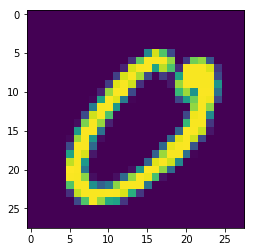

In [9]:
import matplotlib.pyplot as plt
tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[3])
v2 = tf.get_variable("v2", shape=[5])

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(session, "/tmp/model3.ckpt")
    print("Model restored.")
    pic = mnist.get_test_batch(1)
    pic = next(pic)[0]
    plt.imshow(pic[0,:,:])
    prediction = session.run([label],feed_dict = {input_layer: pic})
    print(prediction[0][0])